This notebook is used to analyse the model runs for no discharge and with discharge scenarios and to plot the original streamflow data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the weiherbach and schwarzbach data
#With discharge
file_path = r'y_obs.csv'
y_obs = pd.read_csv(file_path, parse_dates=[0])
# Set the unnamed first column (dates) as the index
y_obs.set_index(y_obs.columns[0],inplace=True)
file_path = r'y_sim.csv'
y_sim = pd.read_csv(file_path, parse_dates=[0])
# Set the unnamed first column (dates) as the index
y_sim.set_index(y_sim.columns[0],inplace=True)
file_path = r'U:\02_Software\Github\lstm_backward\results\withoutdischarge_ungauged\y_sim.csv'
y_sim_no_disch = pd.read_csv(file_path, parse_dates=[0])
# Set the unnamed first column (dates) as the index
y_sim_no_disch.set_index(y_sim_no_disch.columns[0],inplace=True)

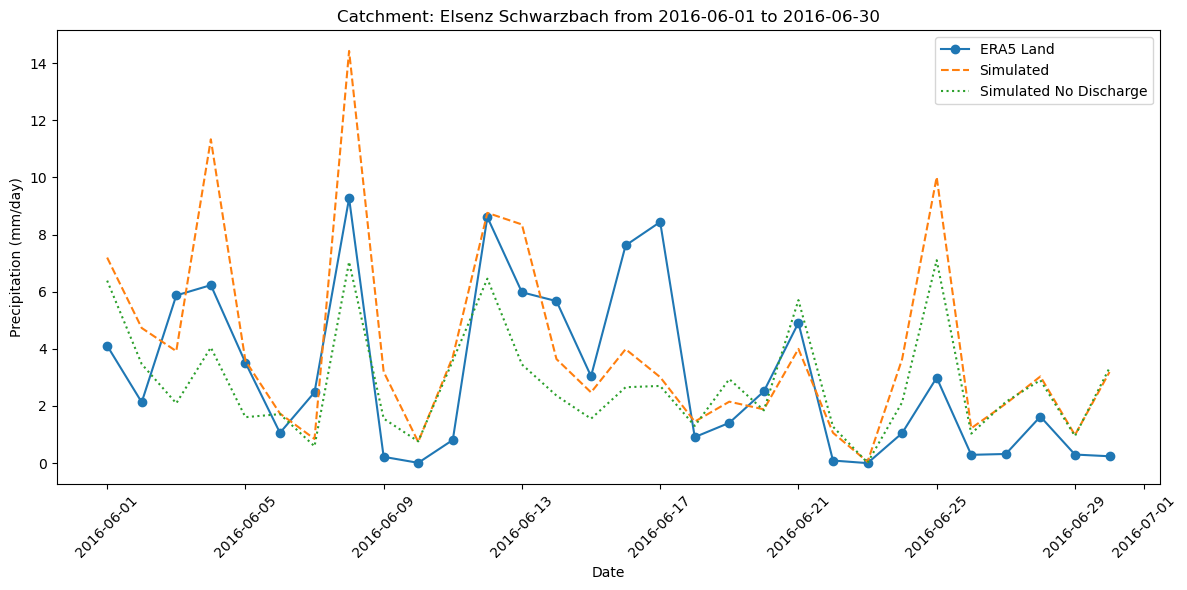

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrames
# Assuming y_obs, y_sim, and y_sim_no_disch are already defined with datetime index and columns for each catchment
# Example definition:
# y_obs = pd.DataFrame(data, index=pd.date_range('2020-01-01', periods=100, freq='D'))
# y_sim = pd.DataFrame(data, index=pd.date_range('2020-01-01', periods=100, freq='D'))
# y_sim_no_disch = pd.DataFrame(data, index=pd.date_range('2020-01-01', periods=100, freq='D'))

def plot_catchment_data(y_obs, y_sim, y_sim_no_disch, catchment, start_date, end_date):
    # Filter data by the specified date range
    y_obs_filtered = y_obs.loc[start_date:end_date, catchment]
    y_sim_filtered = y_sim.loc[start_date:end_date, catchment]
    y_sim_no_disch_filtered = y_sim_no_disch.loc[start_date:end_date, catchment]

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(y_obs_filtered.index, y_obs_filtered, label='ERA5 Land', marker='o')
    plt.plot(y_sim_filtered.index, y_sim_filtered, label='Simulated', linestyle='--')
    plt.plot(y_sim_no_disch_filtered.index, y_sim_no_disch_filtered, label='Simulated No Discharge', linestyle=':')
    
    # Adding labels and legend
    plt.xlabel('Date')
    plt.ylabel('Precipitation (mm/day)')
    plt.title(f'Catchment: Elsenz Schwarzbach from {start_date} to {end_date}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Example Usage
catchment = 'testde_2'  # Specify the column name corresponding to the catchment
start_date = '2016-06-01'
end_date = '2016-06-30'

plot_catchment_data(y_obs, y_sim, y_sim_no_disch, catchment, start_date, end_date)


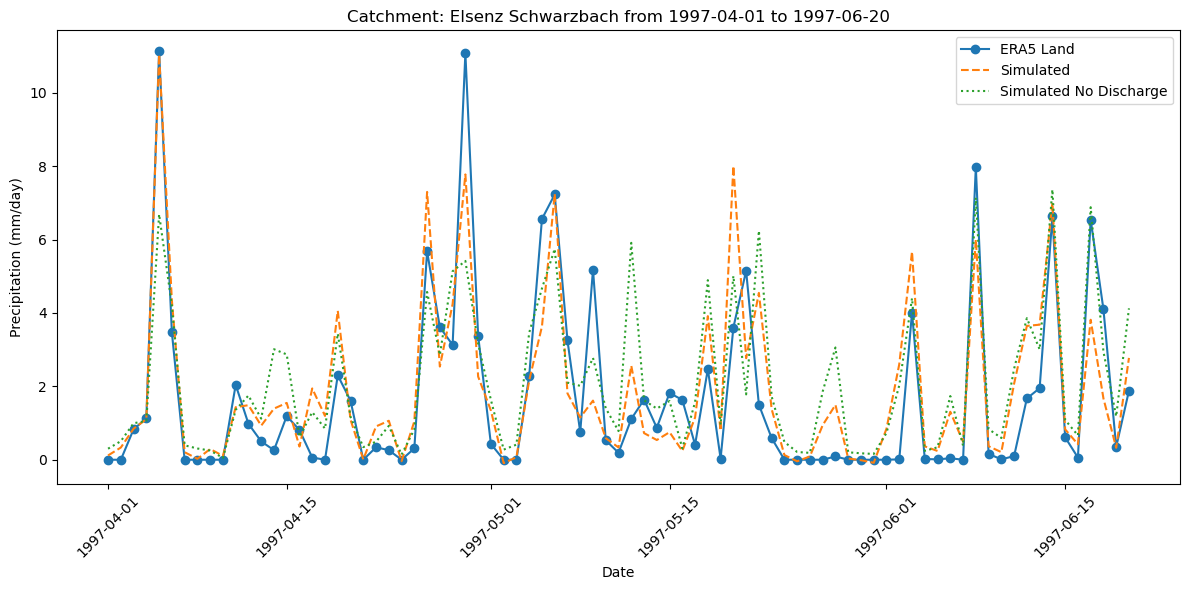

In [4]:
# Example Usage
catchment = 'testde_2'  # Specify the column name corresponding to the catchment
start_date = '1997-04-01'
end_date = '1997-06-20'

plot_catchment_data(y_obs, y_sim, y_sim_no_disch, catchment, start_date, end_date)


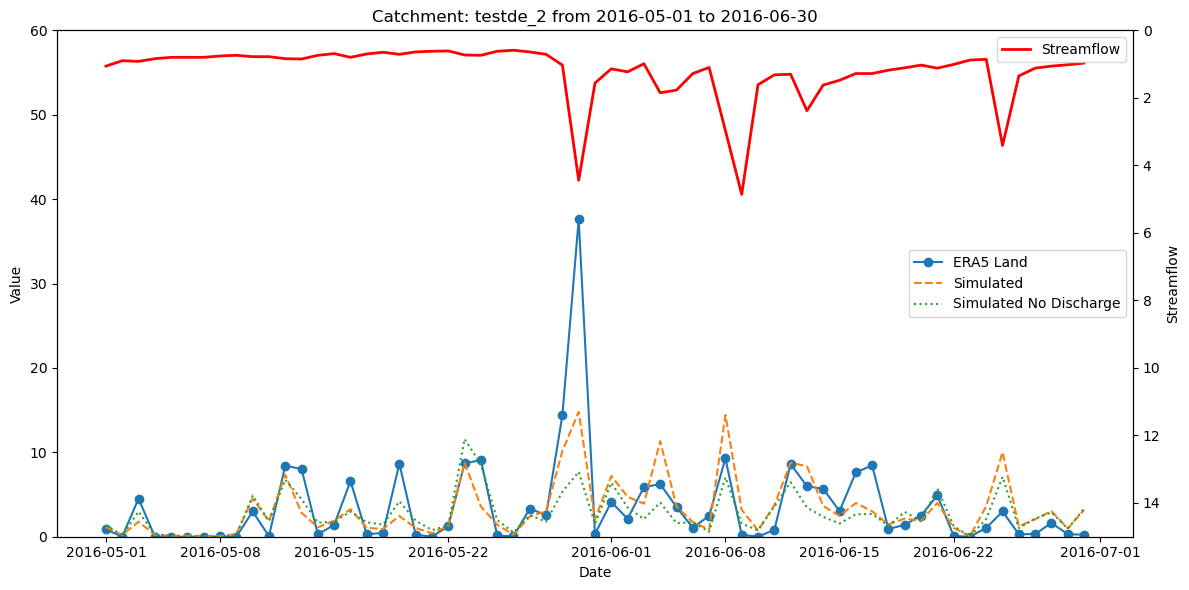

In [28]:

# Define the function to plot data with an additional CSV streamflow plot
def plot_catchment_data_with_streamflow(y_obs, y_sim, y_sim_no_disch, csv_path, catchment, start_date, end_date):
    # Filter data by the specified date range
    y_obs_filtered = y_obs.loc[start_date:end_date, catchment]
    y_sim_filtered = y_sim.loc[start_date:end_date, catchment]
    y_sim_no_disch_filtered = y_sim_no_disch.loc[start_date:end_date, catchment]

    # Read the CSV file for streamflow data
    streamflow_df = pd.read_csv(csv_path, parse_dates=True, index_col=0)
    
    # Filter the streamflow data
    streamflow_filtered = streamflow_df.loc[start_date:end_date, 'streamflow']

    # Plotting
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot the existing dataframes
    ax1.plot(y_obs_filtered.index, y_obs_filtered, label='ERA5 Land', marker='o')
    ax1.plot(y_sim_filtered.index, y_sim_filtered, label='Simulated', linestyle='--')
    ax1.plot(y_sim_no_disch_filtered.index, y_sim_no_disch_filtered, label='Simulated No Discharge', linestyle=':')

    # Add labels and legend to the primary y-axis
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Value')
    ax1.set_title(f'Catchment: {catchment} from {start_date} to {end_date}')
    ax1.legend(loc='center right')
    ax1.set_ylim([0, 60])

    # Create a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(streamflow_filtered.index, streamflow_filtered, label='Streamflow', color='red', linestyle='-', linewidth=2)
    #ax2.fill_between( 0, streamflow_filtered.loc[:,'Streamflow'], color='red', alpha = 0.5)
    ax2.set_ylabel('Streamflow')
    ax2.legend(loc='upper right')
    ax2.set_ylim([0, 15])
    ax2.invert_yaxis()
   

    # Formatting the plot
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Example Usage
catchment = 'testde_2'  # Specify the column name corresponding to the catchment
csv_path = rf"S:\ashish\01_Analysis\01_Europe_Flood_Analysis\Caravan\Caravan\timeseries\csv\testde\{catchment}.csv"
start_date = '2016-05-01'
end_date = '2016-06-30'

plot_catchment_data_with_streamflow(y_obs, y_sim, y_sim_no_disch, csv_path, catchment, start_date, end_date)


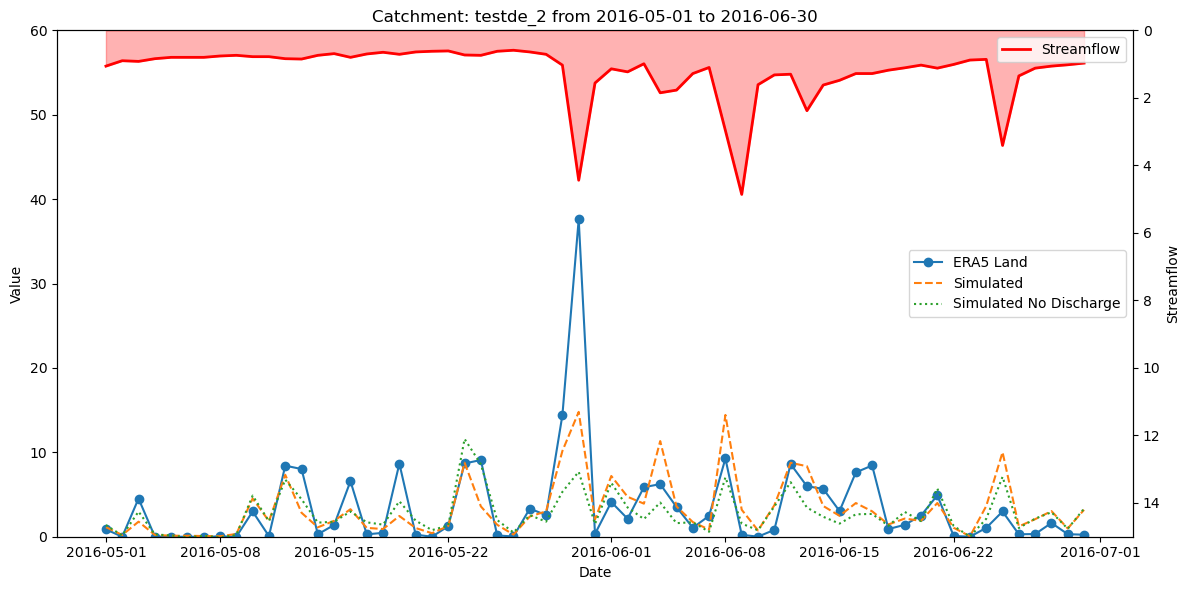

In [29]:
# Define the function to plot data with an additional CSV streamflow plot
def plot_catchment_data_with_streamflow(y_obs, y_sim, y_sim_no_disch, csv_path, catchment, start_date, end_date):
    # Filter data by the specified date range
    y_obs_filtered = y_obs.loc[start_date:end_date, catchment]
    y_sim_filtered = y_sim.loc[start_date:end_date, catchment]
    y_sim_no_disch_filtered = y_sim_no_disch.loc[start_date:end_date, catchment]

    # Read the CSV file for streamflow data
    streamflow_df = pd.read_csv(csv_path, parse_dates=True, index_col=0)
    
    # Filter the streamflow data
    streamflow_filtered = streamflow_df.loc[start_date:end_date, 'streamflow']

    # Plotting
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot the existing dataframes
    ax1.plot(y_obs_filtered.index, y_obs_filtered, label='ERA5 Land', marker='o')
    ax1.plot(y_sim_filtered.index, y_sim_filtered, label='Simulated', linestyle='--')
    ax1.plot(y_sim_no_disch_filtered.index, y_sim_no_disch_filtered, label='Simulated No Discharge', linestyle=':')

    # Add labels and legend to the primary y-axis
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Value')
    ax1.set_title(f'Catchment: {catchment} from {start_date} to {end_date}')
    ax1.legend(loc='center right')
    ax1.set_ylim([0, 60])

    # Create a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(streamflow_filtered.index, streamflow_filtered, label='Streamflow', color='red', linestyle='-', linewidth=2)
    ax2.fill_between(streamflow_filtered.index, streamflow_filtered, color='red', alpha=0.3)
    ax2.set_ylabel('Streamflow')
    ax2.legend(loc='upper right')
    ax2.set_ylim([0, 15])
    ax2.invert_yaxis()
   

    # Formatting the plot
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Example Usage
catchment = 'testde_2'  # Specify the column name corresponding to the catchment
csv_path = rf"S:\ashish\01_Analysis\01_Europe_Flood_Analysis\Caravan\Caravan\timeseries\csv\testde\{catchment}.csv"
start_date = '2016-05-01'
end_date = '2016-06-30'

plot_catchment_data_with_streamflow(y_obs, y_sim, y_sim_no_disch, csv_path, catchment, start_date, end_date)

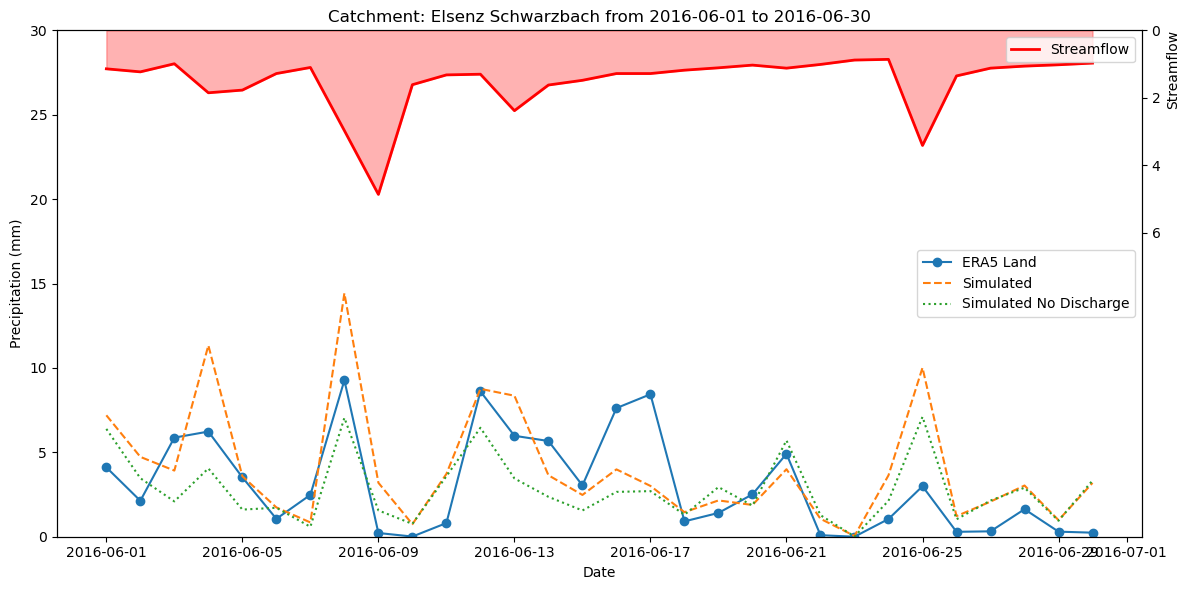

In [37]:
# Define the function to plot data with an additional CSV streamflow plot
def plot_catchment_data_with_streamflow(y_obs, y_sim, y_sim_no_disch, csv_path, catchment, start_date, end_date):
    # Filter data by the specified date range
    y_obs_filtered = y_obs.loc[start_date:end_date, catchment]
    y_sim_filtered = y_sim.loc[start_date:end_date, catchment]
    y_sim_no_disch_filtered = y_sim_no_disch.loc[start_date:end_date, catchment]

    # Read the CSV file for streamflow data
    streamflow_df = pd.read_csv(csv_path, parse_dates=True, index_col=0)
    
    # Filter the streamflow data
    streamflow_filtered = streamflow_df.loc[start_date:end_date, 'streamflow']

    # Plotting
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot the existing dataframes
    ax1.plot(y_obs_filtered.index, y_obs_filtered, label='ERA5 Land', marker='o')
    ax1.plot(y_sim_filtered.index, y_sim_filtered, label='Simulated', linestyle='--')
    ax1.plot(y_sim_no_disch_filtered.index, y_sim_no_disch_filtered, label='Simulated No Discharge', linestyle=':')

    # Add labels and legend to the primary y-axis
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Precipitation (mm)')
    ax1.set_title(f'Catchment: Elsenz Schwarzbach from {start_date} to {end_date}')
    ax1.legend(loc='center right')
    ax1.set_ylim([0, 30])

    # Create a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(streamflow_filtered.index, streamflow_filtered, label='Streamflow', color='red', linestyle='-', linewidth=2)
    ax2.fill_between(streamflow_filtered.index, streamflow_filtered, color='red', alpha=0.3)
    ax2.set_ylabel('Streamflow', loc='top')
    ax2.legend(loc='upper right')
    ax2.set_ylim([0, 15])
    ax2.set_yticks([0,2,4,6])
    ax2.invert_yaxis()
   

    # Formatting the plot
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Example Usage
catchment = 'testde_2'  # Specify the column name corresponding to the catchment
csv_path = rf"S:\ashish\01_Analysis\01_Europe_Flood_Analysis\Caravan\Caravan\timeseries\csv\testde\{catchment}.csv"
start_date = '2016-06-01'
end_date = '2016-06-30'

plot_catchment_data_with_streamflow(y_obs, y_sim, y_sim_no_disch, csv_path, catchment, start_date, end_date)

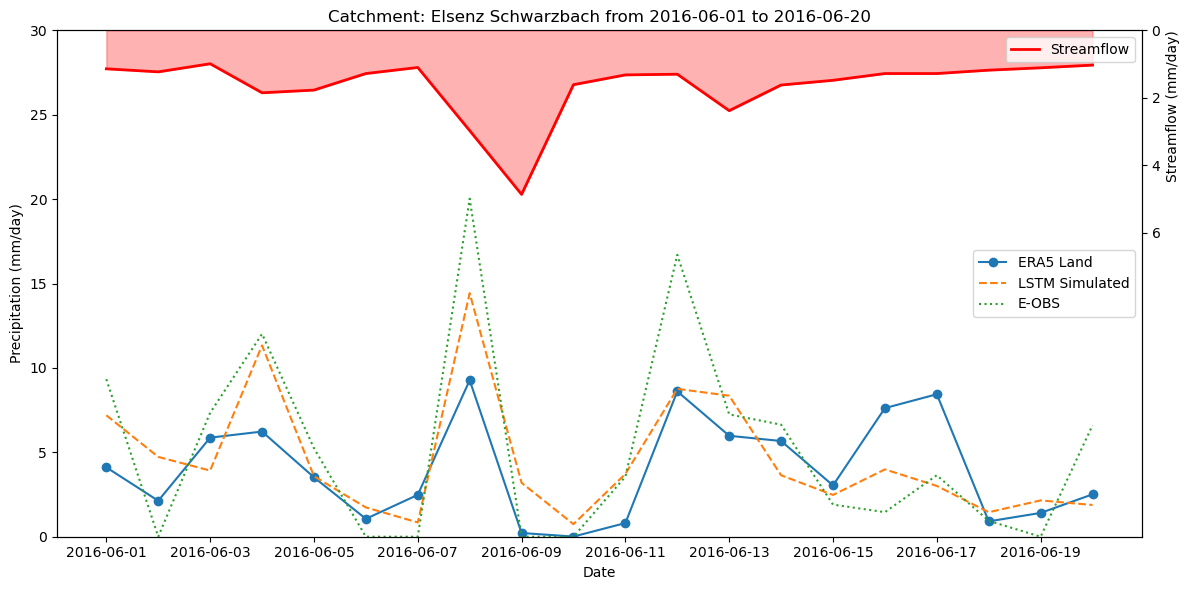

In [13]:
# Define the function to plot data with an additional CSV streamflow plot
def plot_catchment_data_with_streamflow(y_obs, y_sim, y_sim_no_disch, csv_path,csv_path1, catchment, start_date, end_date):
    # Filter data by the specified date range
    y_obs_filtered = y_obs.loc[start_date:end_date, catchment]
    y_sim_filtered = y_sim.loc[start_date:end_date, catchment]
    y_sim_no_disch_filtered = y_sim_no_disch.loc[start_date:end_date, catchment]

    # Read the CSV file for streamflow data
    streamflow_df = pd.read_csv(csv_path, parse_dates=True, index_col=0)
    eobs_df = pd.read_csv(csv_path1, parse_dates=True, index_col=0)
    
    # Filter the streamflow data
    streamflow_filtered = streamflow_df.loc[start_date:end_date, 'streamflow']
    eobs_df_filtered = eobs_df.loc[start_date:end_date, 'value']

    # Plotting
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot the existing dataframes
    ax1.plot(y_obs_filtered.index, y_obs_filtered, label='ERA5 Land', marker='o')
    ax1.plot(y_sim_filtered.index, y_sim_filtered, label='LSTM Simulated', linestyle='--')
    #ax1.plot(y_sim_no_disch_filtered.index, y_sim_no_disch_filtered, label='Simulated No Discharge', linestyle=':')
    ax1.plot(eobs_df_filtered.index, eobs_df_filtered, label='E-OBS', linestyle=':')

    # Add labels and legend to the primary y-axis
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Precipitation (mm/day)')
    ax1.set_title(f'Catchment: Elsenz Schwarzbach from {start_date} to {end_date}')
    ax1.legend(loc='center right')
    ax1.set_ylim([0, 30])

    # Create a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(streamflow_filtered.index, streamflow_filtered, label='Streamflow', color='red', linestyle='-', linewidth=2)
    ax2.fill_between(streamflow_filtered.index, streamflow_filtered, color='red', alpha=0.3)
    ax2.set_ylabel('Streamflow (mm/day)', loc='top')
    ax2.legend(loc='upper right')
    ax2.set_ylim([0, 15])
    ax2.set_yticks([0,2,4,6])
    ax2.invert_yaxis()
   

    # Formatting the plot
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Example Usage
catchment = 'testde_2'  # Specify the column name corresponding to the catchment
csv_path = rf"S:\ashish\01_Analysis\01_Europe_Flood_Analysis\Caravan\Caravan\timeseries\csv\testde\{catchment}.csv"
csv_path1 = rf"precip_eobs_schwarzbach.csv"
start_date = '2016-06-01'
end_date = '2016-06-20'

plot_catchment_data_with_streamflow(y_obs, y_sim, y_sim_no_disch, csv_path,csv_path1, catchment, start_date, end_date)

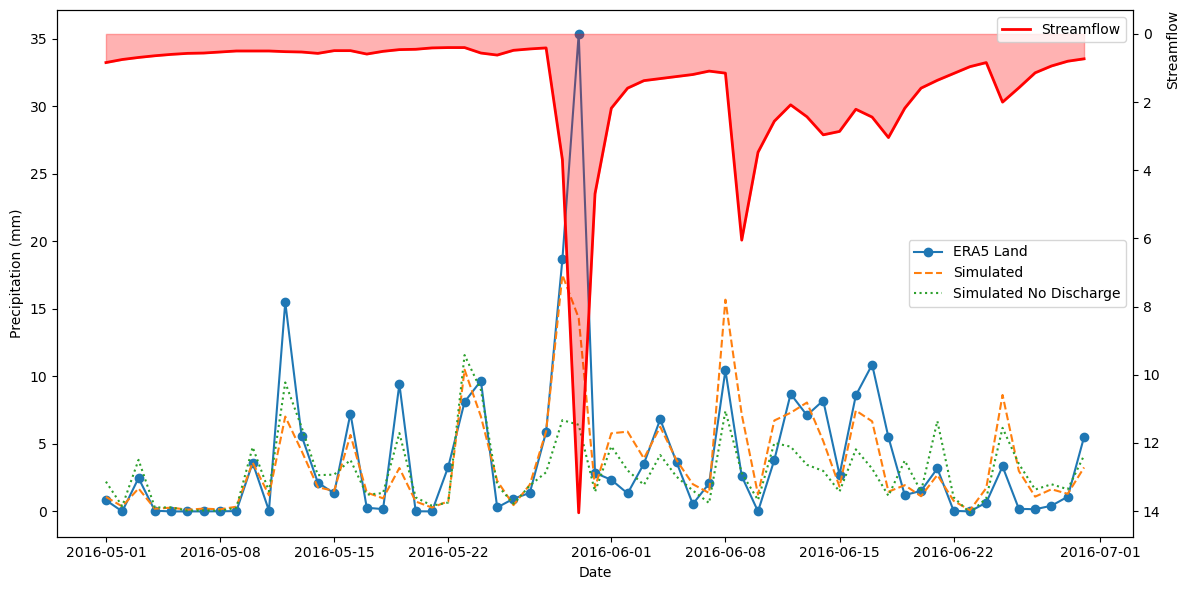

In [40]:
# Define the function to plot data with an additional CSV streamflow plot
def plot_catchment_data_with_streamflow(y_obs, y_sim, y_sim_no_disch, csv_path, catchment, start_date, end_date):
    # Filter data by the specified date range
    y_obs_filtered = y_obs.loc[start_date:end_date, catchment]
    y_sim_filtered = y_sim.loc[start_date:end_date, catchment]
    y_sim_no_disch_filtered = y_sim_no_disch.loc[start_date:end_date, catchment]

    # Read the CSV file for streamflow data
    streamflow_df = pd.read_csv(csv_path, parse_dates=True, index_col=0)
    
    # Filter the streamflow data
    streamflow_filtered = streamflow_df.loc[start_date:end_date, 'streamflow']

    # Plotting
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot the existing dataframes
    ax1.plot(y_obs_filtered.index, y_obs_filtered, label='ERA5 Land', marker='o')
    ax1.plot(y_sim_filtered.index, y_sim_filtered, label='Simulated', linestyle='--')
    ax1.plot(y_sim_no_disch_filtered.index, y_sim_no_disch_filtered, label='Simulated No Discharge', linestyle=':')

    # Add labels and legend to the primary y-axis
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Precipitation (mm)')
    ax1.legend(loc='center right')

    # Create a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(streamflow_filtered.index, streamflow_filtered, label='Streamflow', color='red', linestyle='-', linewidth=2)
    ax2.fill_between(streamflow_filtered.index, streamflow_filtered, color='red', alpha=0.3)
    ax2.set_ylabel('Streamflow', loc='top')
    ax2.legend(loc='upper right')
    ax2.invert_yaxis()
   

    # Formatting the plot
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Example Usage
catchment = 'camelsde_111630'  # Specify the column name corresponding to the catchment
csv_path = rf"S:\ashish\01_Analysis\01_Europe_Flood_Analysis\camels_de_caravan\Camels_DE_Final\Timeseries\csv\{catchment}.csv"
start_date = '2016-05-01'
end_date = '2016-06-30'

plot_catchment_data_with_streamflow(y_obs, y_sim, y_sim_no_disch, csv_path, catchment, start_date, end_date)